In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [2]:
dirf='/mnt/meom/workdir/alberta/eNATL60/eNATL60-I/eNATL60noMED_bathy_degrad4.nc'
ds=xr.open_dataset(dirf,decode_times=False)
ds

<xarray.Dataset>
Dimensions:              (time_counter: 1, y: 1181, x: 1480, z: 1)
Coordinates:
  * time_counter         (time_counter) float64 1e+11
  * z                    (z) float32 0.4805
Dimensions without coordinates: y, x
Data variables:
    degraded_Bathymetry  (time_counter, y, x) float32 ...
    flsdc                (time_counter, y, x) float32 ...
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May 23 17:37:00 2022: ncks -O -F -d x,1,1480 degra...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [3]:
bathy = ds.degraded_Bathymetry.squeeze("time_counter")
navlon = ds.nav_lon
navlat = ds.nav_lat

In [4]:
bathy

<xarray.DataArray 'degraded_Bathymetry' (y: 1181, x: 1480)>
[1747880 values with dtype=float32]
Coordinates:
    time_counter  float64 1e+11
Dimensions without coordinates: y, x
Attributes:
    units:             meters
    valid_min:         -100000.0
    valid_max:         100000.0
    long_name:         degraded Median depth by area
    short_name:        degraded_
    iweight:           1
    online_operation:  N/A
    axis:              TZYX
    savelog10:         0.0

In [5]:
bathy_mask=ma.masked_where(bathy==0.,bathy)

bathy_mask

/home/roussilh/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/roussilh/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_29990/3832223028.py:22: MatplotlibDeprecationWarning: savefig() got un

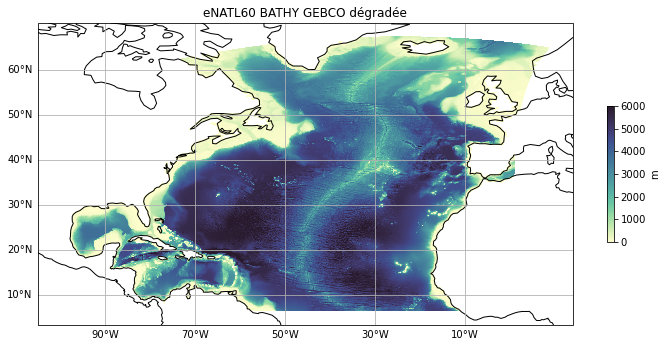

In [6]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(navlon,navlat,bathy_mask,transform=ccrs.PlateCarree(),cmap=cmocean.cm.deep,vmin=0,vmax=6000)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('eNATL60 BATHY GEBCO dégradée')
plt.savefig('bathy_gebco_eNATL60_dégradée.png', bbbox_inches='tight')

In [7]:
dirf='/mnt/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/noMED-degrad/eNATL60noMED-BLBT02_y2010m06d30.1h_Vbottomdegrad.nc'
dirf

'/mnt/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/noMED-degrad/eNATL60noMED-BLBT02_y2010m06d30.1h_Vbottomdegrad.nc'

In [8]:
lo=xr.open_dataset(dirf)
lo

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1182, x: 1480, depthv: 1)
Coordinates:
  * depthv             (depthv) float32 0.4805
  * time_counter       (time_counter) datetime64[ns] 2010-06-30T00:30:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    degraded_vomecrty  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:36:57 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [9]:
vit = lo.degraded_vomecrty[0 ,: ,:]
navlon = lo.nav_lon
navlat = lo.nav_lat

In [10]:
vit

<xarray.DataArray 'degraded_vomecrty' (y: 1182, x: 1480)>
[1749360 values with dtype=float32]
Coordinates:
    time_counter  datetime64[ns] 2010-06-30T00:30:00
Dimensions without coordinates: y, x
Attributes:
    units:             m/s
    valid_min:         -100000.0
    valid_max:         100000.0
    long_name:         degraded Bottom ocean current along j-axis
    short_name:        degraded_N/A
    iweight:           1
    online_operation:  N/A
    axis:              TYX
    savelog10:         0.0

In [11]:
vit_mask=ma.masked_where(vit==0.,vit)

In [12]:
print(np.arange(-1,1,0.15))

[-1.   -0.85 -0.7  -0.55 -0.4  -0.25 -0.1   0.05  0.2   0.35  0.5   0.65
  0.8   0.95]


/tmp/ipykernel_29990/1778325920.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('V_bottom_eNATL60_degradee.png', bbbox_inches='tight')


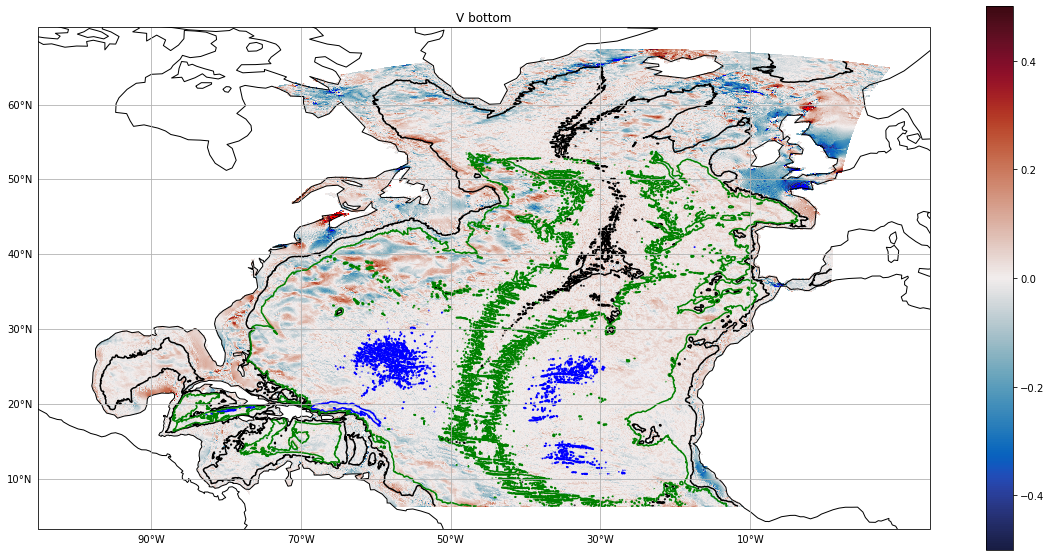

In [48]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree())

x = navlon
y = navlat
z = vit

cs = ax.pcolormesh(navlon,navlat,z,vmin=-0.5, vmax=0.5,transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance)
cs2 = ax.contour(navlon,navlat,bathy_mask,[2000],transform=ccrs.PlateCarree(),colors='k',label='black = 2000m deep')
cs3 = ax.contour(navlon,navlat,bathy_mask,[6000],transform=ccrs.PlateCarree(),colors='b',label='blue = 6000m deep')
cs4 = ax.contour(navlon,navlat,bathy_mask,[4000],transform=ccrs.PlateCarree(),colors='g',label='green = 4000m deeep')

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False

ax.add_feature(cfeature.COASTLINE)

plt.colorbar(cs)

plt.title('V bottom')
plt.savefig('V_bottom_eNATL60_degradee.png', bbbox_inches='tight')

In [14]:
ubot='/mnt/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/noMED-degrad/eNATL60noMED-BLBT02_y2010m06d30.1h_Ubottomdegrad.nc'
ubot

'/mnt/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/noMED-degrad/eNATL60noMED-BLBT02_y2010m06d30.1h_Ubottomdegrad.nc'

In [15]:
mo=xr.open_dataset(ubot)
mo

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1181, x: 1480, depthu: 1)
Coordinates:
  * depthu             (depthu) float32 0.4805
  * time_counter       (time_counter) datetime64[ns] 2010-06-30T00:30:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    degraded_vozocrtx  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:36:55 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [16]:
vit = mo.degraded_vozocrtx[0 ,: ,:]
navlon = mo.nav_lon
navlat = mo.nav_lat

In [17]:
vit

<xarray.DataArray 'degraded_vozocrtx' (y: 1181, x: 1480)>
[1747880 values with dtype=float32]
Coordinates:
    time_counter  datetime64[ns] 2010-06-30T00:30:00
Dimensions without coordinates: y, x
Attributes:
    units:             m/s
    valid_min:         -100000.0
    valid_max:         100000.0
    long_name:         degraded Bottom ocean current along i-axis
    short_name:        degraded_N/A
    iweight:           1
    online_operation:  N/A
    axis:              TYX
    savelog10:         0.0

In [18]:
vit_mask=ma.masked_where(vit==0.,vit)

/tmp/ipykernel_29990/501498570.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('U_bottom_eNATL60_degradee.png', bbbox_inches='tight')


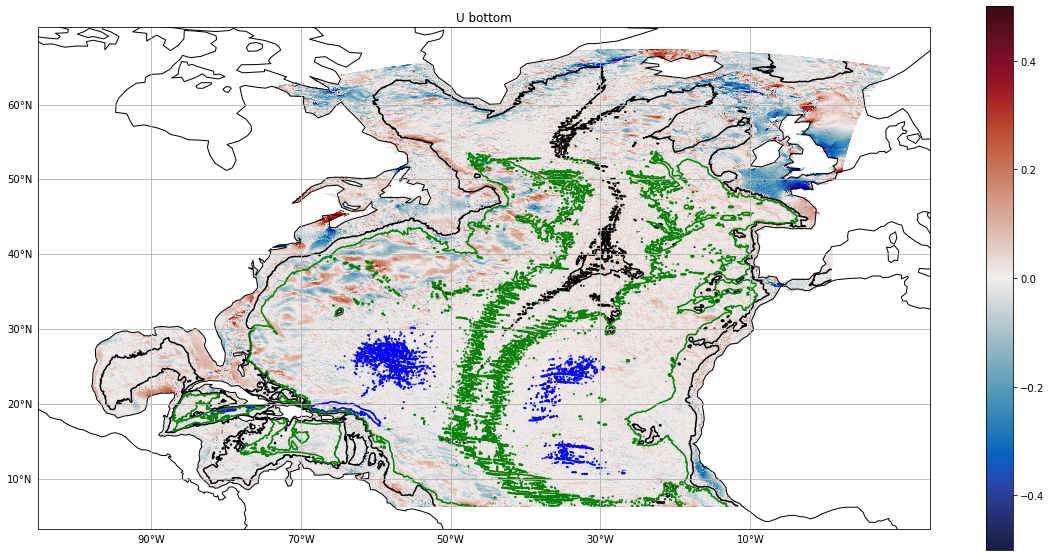

In [50]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree())

x = navlon
y = navlat
z = vit

cs = ax.pcolormesh(navlon,navlat,z,vmin=-0.5, vmax=0.5,transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance)
cs2 = ax.contour(navlon,navlat,bathy_mask,[2000],transform=ccrs.PlateCarree(),colors='k')
cs2 = ax.contour(navlon,navlat,bathy_mask,[6000],transform=ccrs.PlateCarree(),colors='b')
cs4 = ax.contour(navlon,navlat,bathy_mask,[4000],transform=ccrs.PlateCarree(),colors='g',label='green = 4000m deeep')

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False

ax.add_feature(cfeature.COASTLINE)

plt.colorbar(cs)

plt.title('U bottom')
plt.savefig('U_bottom_eNATL60_degradee.png', bbbox_inches='tight')